In [55]:
import numpy as np
from ineqpy.inequality import gini
from matplotlib import pyplot as plt

In [56]:
df = np.loadtxt(
    "https://raw.githubusercontent.com/nickeubank/practicaldatascience/master/Example_Data/us_household_incomes.txt"
)
results = {}
# print(df)

Text(0.5, 1.0, 'Distribution of US Household Incomes')

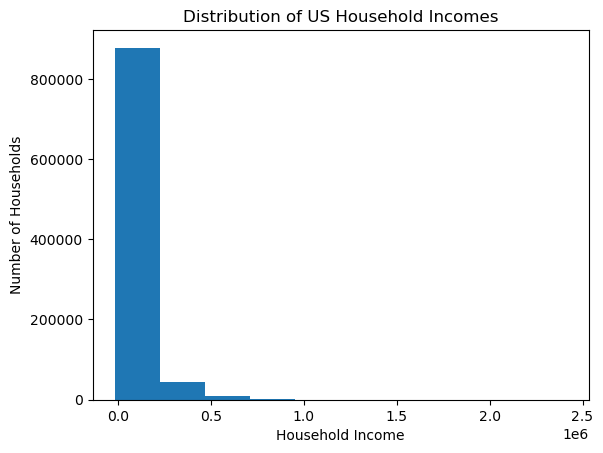

In [57]:
plt.hist(df)
plt.xlabel("Household Income")
plt.ylabel("Number of Households")
plt.title("Distribution of US Household Incomes")

(array([262190., 338722., 173615.,  76580.,  33854.,  16134.,   8329.,
          5401.,   4556.,   4038.]),
 array([-16942.,  34752.,  86446., 138140., 189834., 241528., 293222.,
        344916., 396610., 448304., 499998.]),
 <BarContainer object of 10 artists>)

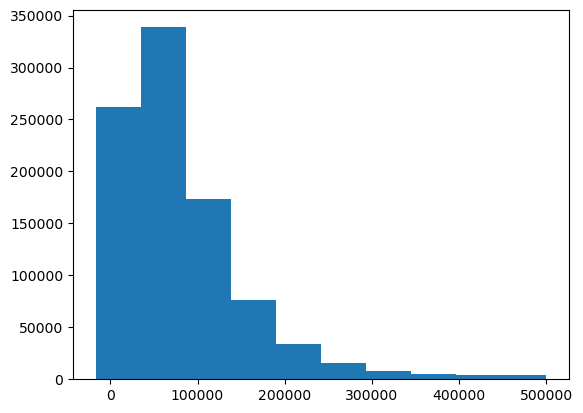

In [58]:
df_low = df[df < 500_000]
plt.hist(df_low)

In [59]:
low = df[df < 20000]
count_low = len(low)
# print(count_low)
count_whole = len(df)
# print(count_whole)
ex4_share_below_poverty = count_low / count_whole
print(f"Share of households below the poverty line: {ex4_share_below_poverty:.2f}")

Share of households below the poverty line: 0.15


In [60]:
pro_index = gini(df)
print(f"The inequality index of the household income is: {pro_index:.2f}")

The inequality index of the household income is: 0.48


## ex 5

In [69]:
policy_A = df.copy()
below_4 = df[df < 40000]
check1 = below_4 + 5000
policy_A[policy_A < 40000] = check1
print(f"The new Gini index after policy A is: {gini(policy_A):.4f}")

The new Gini index after policy A is: 0.4602


In [70]:
policy_B = df.copy()
below_3 = df[df < 30000]
check2 = below_3 + 7000
policy_B[policy_B < 30000] = check2
print(f"The new Gini index after policy B is: {gini(policy_B):.4f}")

The new Gini index after policy B is: 0.4583


In [63]:
policy_C = df.copy()
above_25 = df[df > 250000]
tax = above_25 * 0.95
policy_C[policy_C > 250000] = tax
ex7_gini_policy_c = gini(policy_C)
print(f"The new Gini index after policy C is: {ex7_gini_policy_c:.2f}")

The new Gini index after policy C is: 0.48


In [64]:
policy_D = df.copy()
above_25 = df[df > 250000]
tax = above_25 * 0.95
share = above_25 * 0.05
ex8_revenue_raised = share.sum()
print(f"The amount of money generated by tax is: {ex8_revenue_raised:.2f}")

The amount of money generated by tax is: 929623340.85


In [65]:
share_D = ex8_revenue_raised / len(below_3)
# below_3 was created in policy_B
ex9_transfers = share_D
print(f"The amount of transfer is: {ex9_transfers:.2f}")

The amount of transfer is: 4208.23


In [66]:
policy_D[policy_D > 250000] = tax
policy_D[policy_D < 30000] = below_3 + share_D  # below_3 was created in policy_B
ex10_gini_policy_d = gini(policy_D)
print(f"The new Gini index after policy D is: {ex10_gini_policy_d:.4f}")

The new Gini index after policy D is: 0.4617


In [ ]:
below_4 = df[df < 40000]
share_E = share.sum() / len(below_4)
policy_E = df.copy()
policy_E[policy_E > 250000] = tax  # tax was created in policy_D
policy_E[policy_E < 40000] = below_4 + share_E
ex11_gini_policy_e = gini(policy_E)
print(f"The new Gini index after policy E is: {ex11_gini_policy_e:.4f}")

The new Gini index after policy E is: 0.4626


In [68]:
results["ex12_policy_recommendation"] = "Policy D"